In [5]:
import numpy as np
from numpy.polynomial.hermite import Hermite
from scipy.integrate import quad
import math
import matplotlib.pyplot as plt

m = 1
h = 1
a_0 = 1


def psi_x(x,n, ω):
    return 1/np.sqrt(2**n*math.factorial(n)) * ( (m*ω)/(np.pi*h))**(1/4) * Hn(n,np.sqrt((m*ω)/h)*x) * np.exp((-m*ω*x**2)/(2*h))

def psi_p(p,n, ω):
    return 1/np.sqrt(2**n*math.factorial(n)) * ( 1/(np.pi*m*ω*h))**(1/4) * Hn(n,(1/np.sqrt(m*ω*h))*p) * np.exp((-p**2)/(2*m*ω*h))

def Hn(n, x):
    coefficients = np.zeros(n+1)
    coefficients[n] = 1
    return Hermite(coefficients)(x)

def integrand1(x,n,a):
    return np.log(Hn(n,a*x)**2)*Hn(n,a*x)**2*np.exp(-a**2*x**2)

def integrand2(x,n,a):
    return x**2 * Hn(n,a*x)**2 *np.exp(-a**2*x**2)

def entropy_x(n,ω):
    a = np.sqrt((m*ω)/h)
    integrand1_result, error = quad(integrand1, 0, np.inf, args=(n,a,), limit=100)
    integrand2_result, error = quad(integrand2, -np.inf, np.inf, args=(n,a,), limit=100)


    return -np.log( (a_0*a)/(2**n*math.factorial(n)*np.sqrt(np.pi))) - a/(2**n*math.factorial(n)*np.sqrt(np.pi)) * (2*integrand1_result - a**2*integrand2_result)

def entropy_p(n,ω):
    b = 1/np.sqrt(m*ω*h)
    integrand1_result, error = quad(integrand1, 0, np.inf, args=(n,b,), limit=100)
    integrand2_result, error = quad(integrand2, -np.inf, np.inf, args=(n,b,), limit=100)


    return -np.log( (h*b)/(a_0*2**n*math.factorial(n)*np.sqrt(np.pi))) - b/(2**n*math.factorial(n)*np.sqrt(np.pi)) * (2*integrand1_result - b**2*integrand2_result)

In [4]:
s_x_ground_state = entropy_x(0 ,0.06)
s_p_ground_state = entropy_p(0 ,0.06)
s_t_ground_state = s_x_ground_state + s_p_ground_state

print(round(s_x_ground_state,4))
print(round(s_p_ground_state,4))
print(round(s_t_ground_state,4))


s_x_first_excited_state = entropy_x(1 ,0.06)
s_p_first_excited_state = entropy_p(1 ,0.06)
s_t_first_excited_state = s_x_first_excited_state + s_p_first_excited_state

print(round(s_x_first_excited_state,4))
print(round(s_p_first_excited_state,4))
print(round(s_t_first_excited_state,4))

s_x_second_excited_state = entropy_x(2 ,0.06)
s_p_second_excited_state = entropy_p(2 ,0.06)
s_t_second_excited_state = s_x_second_excited_state + s_p_second_excited_state

print(round(s_x_second_excited_state,4))
print(round(s_p_second_excited_state,4))
print(round(s_t_second_excited_state,4))

2.4791
-0.3343
2.1447
2.7494
-0.064
2.6855
2.9053
0.0919
2.9972


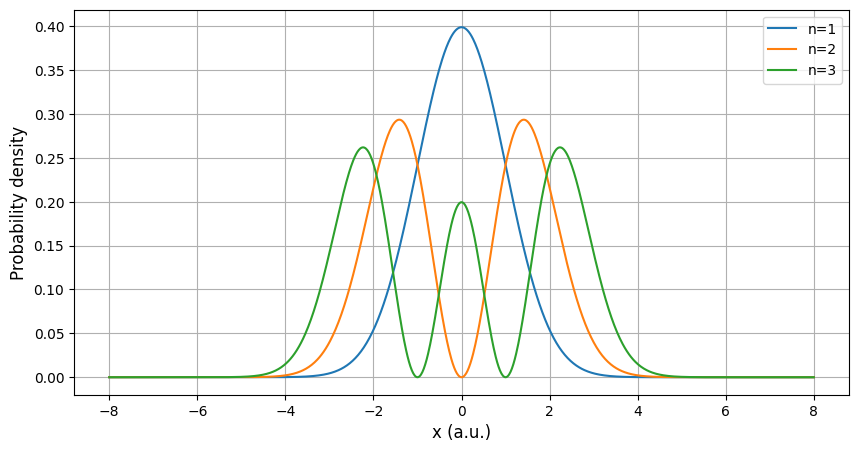

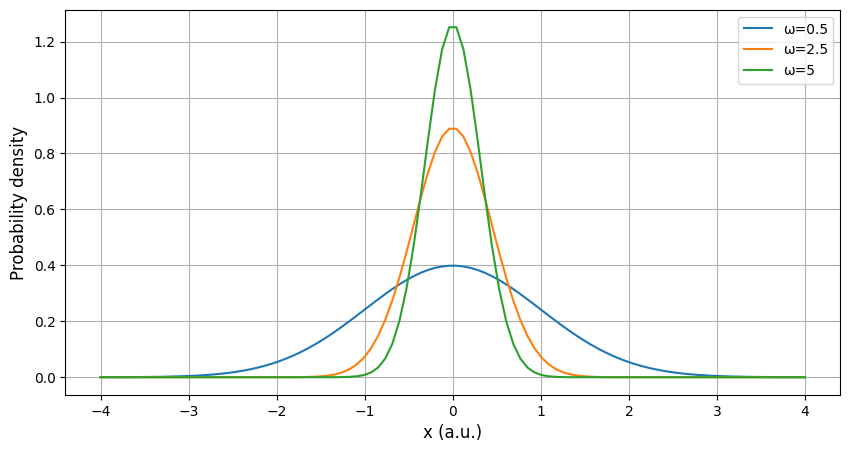

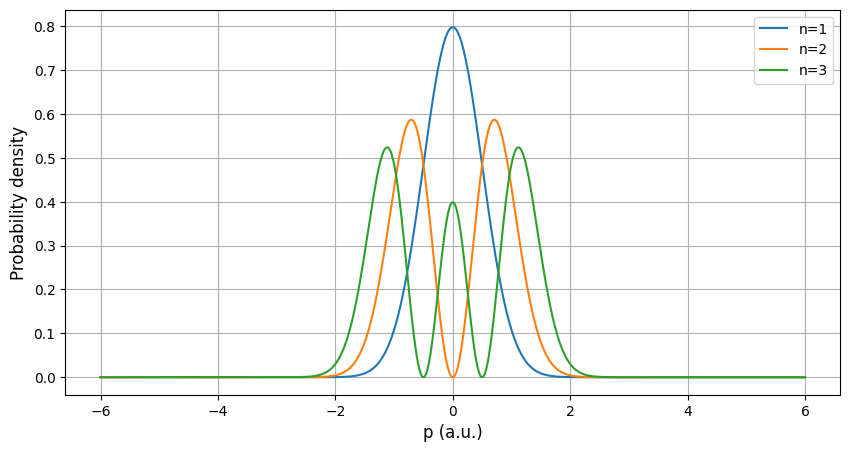

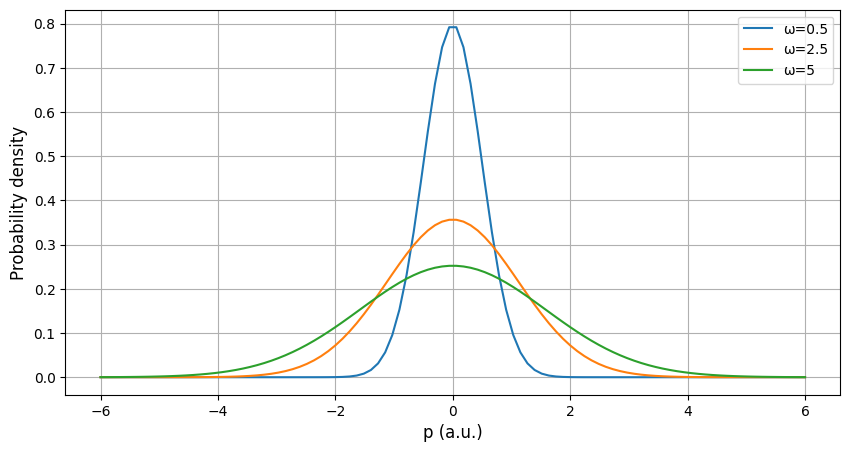

In [6]:

def plot_probability_density_x(ω):

    x_values= np.linspace(-8,8, 1000)
    psi_values_ground_state = []
    psi_values_first_excited_state = []
    psi_values_second_excited_state = []

    for x in x_values:
            psi_values_ground_state.append(psi_x(x,0,ω)**2)

    for x in x_values:
            psi_values_first_excited_state.append(psi_x(x,1,ω)**2)

    for x in x_values:
            psi_values_second_excited_state.append(psi_x(x,2,ω)**2)

    plt.figure(figsize=(10, 5))
    plt.plot(x_values, psi_values_ground_state, linestyle='-', label='n=1')
    plt.plot(x_values, psi_values_first_excited_state,linestyle='-', label='n=2')
    plt.plot(x_values, psi_values_second_excited_state, linestyle='-', label='n=3')
    plt.xlabel('x (a.u.)', fontsize=12)
    plt.ylabel('Probability density', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_probability_density_x_omega():

    omegas=[0.5,2.5,5]
    x_values_1= np.linspace(-4, 4, 100)
    x_values_2= np.linspace(-4, 4, 100)
    x_values_3= np.linspace(-4, 4, 100)

    psi_values_1 = []
    psi_values_2 = []
    psi_values_3 = []

    for x in x_values_1:
            psi_values_1.append(psi_x(x,0,omegas[0])**2)

    for x in x_values_2:
            psi_values_2.append(psi_x(x,0,omegas[1])**2)

    for x in x_values_3:
            psi_values_3.append(psi_x(x,0,omegas[2])**2)

    plt.figure(figsize=(10, 5))
    plt.plot(x_values_1, psi_values_1, linestyle='-', label='ω='+str(omegas[0]))
    plt.plot(x_values_2, psi_values_2,linestyle='-', label='ω='+str(omegas[1]))
    plt.plot(x_values_3, psi_values_3, linestyle='-', label='ω='+str(omegas[2]))
    plt.xlabel('x (a.u.)', fontsize=12)
    plt.ylabel('Probability density', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()



def plot_probability_density_p(ω):

    p_values= np.linspace(-6,6, 1000)
    psi_values_ground_state = []
    psi_values_first_excited_state = []
    psi_values_second_excited_state = []

    for p in p_values:
            psi_values_ground_state.append(psi_p(p,0,ω)**2)

    for p in p_values:
            psi_values_first_excited_state.append(psi_p(p,1,ω)**2)

    for p in p_values:
            psi_values_second_excited_state.append(psi_p(p,2,ω)**2)

    plt.figure(figsize=(10, 5))
    plt.plot(p_values, psi_values_ground_state, linestyle='-', label='n=1')
    plt.plot(p_values, psi_values_first_excited_state,linestyle='-', label='n=2')
    plt.plot(p_values, psi_values_second_excited_state, linestyle='-', label='n=3')
    plt.xlabel('p (a.u.)', fontsize=12)
    plt.ylabel('Probability density', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_probability_density_p_omega():

    omegas=[0.5,2.5,5]
    p_values_1= np.linspace(-6, 6, 100)
    p_values_2= np.linspace(-6, 6, 100)
    p_values_3= np.linspace(-6, 6, 100)

    psi_values_1 = []
    psi_values_2 = []
    psi_values_3 = []

    for p in p_values_1:
            psi_values_1.append(psi_p(p,0,omegas[0])**2)

    for p in p_values_2:
            psi_values_2.append(psi_p(p,0,omegas[1])**2)

    for p in p_values_3:
            psi_values_3.append(psi_p(p,0,omegas[2])**2)

    plt.figure(figsize=(10, 5))
    plt.plot(p_values_1, psi_values_1, linestyle='-', label='ω='+str(omegas[0]))
    plt.plot(p_values_2, psi_values_2,linestyle='-', label='ω='+str(omegas[1]))
    plt.plot(p_values_3, psi_values_3, linestyle='-', label='ω='+str(omegas[2]))
    plt.xlabel('p (a.u.)', fontsize=12)
    plt.ylabel('Probability density', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()


plot_probability_density_x(0.5)
plot_probability_density_x_omega()

plot_probability_density_p(0.5)
plot_probability_density_p_omega()

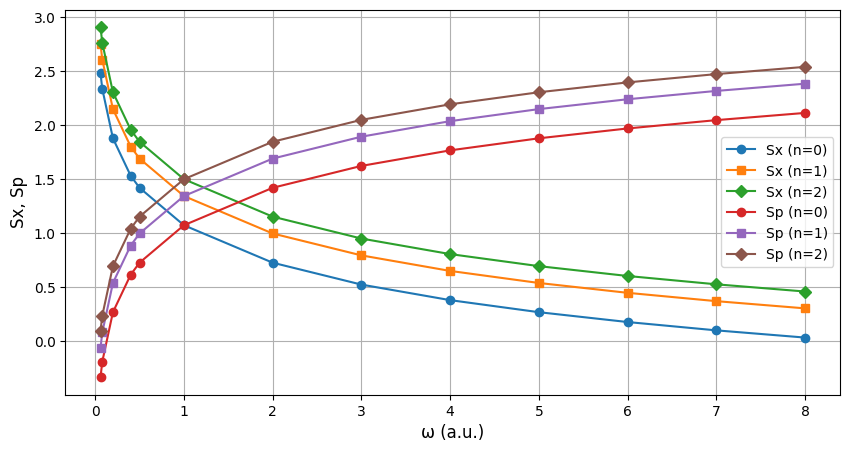

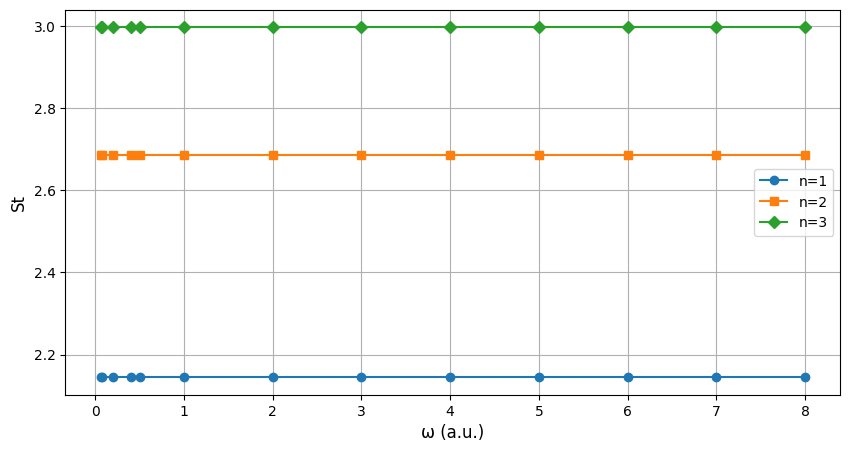

In [7]:
def plot_entropies():

    omegas = [0.06,0.08,0.2,0.4,0.5,1,2,3,4,5,6,7,8]

    entropy_x_values_ground_state= [entropy_x(0, ω) for ω in omegas]
    entropy_x_values_first_excited_state = [entropy_x(1, ω) for ω in omegas]
    entropy_x_values_second_excited_state = [entropy_x(2, ω) for ω in omegas]
    entropy_p_values_ground_state = [entropy_p(0, ω) for ω in omegas]
    entropy_p_values_first_excited_state = [entropy_p(1, ω) for ω in omegas]
    entropy_p_values_second_excited_state = [entropy_p(2, ω) for ω in omegas]


    plt.figure(figsize=(10, 5))
    plt.plot(omegas, entropy_x_values_ground_state, marker="o", linestyle='-', label='Sx (n=0)')
    plt.plot(omegas, entropy_x_values_first_excited_state, marker="s", linestyle='-', label='Sx (n=1)')
    plt.plot(omegas, entropy_x_values_second_excited_state, marker="D", linestyle='-', label='Sx (n=2)')
    plt.plot(omegas, entropy_p_values_ground_state, marker="o",linestyle='-', label='Sp (n=0)')
    plt.plot(omegas, entropy_p_values_first_excited_state, marker="s", linestyle='-', label='Sp (n=1)')
    plt.plot(omegas, entropy_p_values_second_excited_state, marker="D", linestyle='-', label='Sp (n=2)')
    plt.xlabel('ω (a.u.)', fontsize=12)
    plt.ylabel('Sx, Sp', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_total_entropy():


    omegas = [0.06,0.08,0.2,0.4,0.5,1,2,3,4,5,6,7,8]

    entropy_t_values_ground_state = [entropy_x(0, ω)+entropy_p(0, ω) for ω in omegas]
    entropy_t_values_first_excited_state = [entropy_x(1, ω) +entropy_p(1, ω) for ω in omegas]
    entropy_t_values_second_excited_state = [entropy_x(2, ω)+entropy_p(2, ω) for ω in omegas]


    plt.figure(figsize=(10, 5))

    plt.plot(omegas, entropy_t_values_ground_state, marker="o",linestyle='-', label='n=1')
    plt.plot(omegas, entropy_t_values_first_excited_state, marker="s", linestyle='-', label='n=2')
    plt.plot(omegas, entropy_t_values_second_excited_state, marker="D", linestyle='-', label='n=3')
    plt.xlabel('ω (a.u.)', fontsize=12)
    plt.ylabel('St', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()


plot_entropies()
plot_total_entropy()

In [8]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

h = 1
a_0 = 1


def b(n,L):
    return (n*np.pi)/(2*L)

def c(p):
    return p/h

def psi_x_odd(x,n,L):
    return (1/np.sqrt(L)) * np.cos((n*np.pi*x)/L)

def psi_x_even(x,n,L):
    return (1/np.sqrt(L)) * np.sin((n*np.pi*x)/L)

def psi_p_odd(p,n,L):
    return ( (2*b(n,L)*(-1)**((n+1)/2))/(np.sqrt(2*np.pi*h*L)*(c(p)**2 - b(n,L)**2) ) ) * np.cos(c(p)*L)

def psi_p_even(p,n,L):
    return ( (2*b(n,L)*(-1)**((n+2)/2))/(np.sqrt(2*np.pi*h*L)*(c(p)**2 - b(n,L)**2) ) ) * np.sin(c(p)*L)

def entropy_x(x,n,L):
    rho=None
    if n%2==0:
        rho =  psi_x_even(x,n,L)**2
    else:
        rho =  psi_x_odd(x,n,L)**2

    return -rho*np.log(a_0 * rho)

def entropy_p(p,n,L):
    gamma=None
    if n%2==0:
        gamma =  psi_p_even(p,n,L)**2
    else:
        gamma =  psi_p_odd(p,n,L)**2

    return -gamma*np.log((h/a_0) * gamma)

def calc_entropy_x(n, L):

    a = -L
    b = L
    c = 1

    if n%2==0:
        a=0
        c=2

    result, error = quad(entropy_x, a, b, args=(n,L,), limit=1000)
    return c*result

def calc_entropy_p(n, L):

    a = -np.inf
    b = np.inf
    c = 1

    result, error = quad(entropy_p, a, b, args=(n,L,), limit=1000)

    return c*result

s_x_ground_state = round(calc_entropy_x(1,0.05), 4)
s_p_ground_state = round(calc_entropy_p(1,0.05), 4)
s_t_ground_state = s_x_ground_state + s_p_ground_state

In [9]:
s_x_ground_state = calc_entropy_x(1,0.05)
s_p_ground_state = calc_entropy_p(1,0.05)
s_t_ground_state = s_x_ground_state + s_p_ground_state

print(round(s_x_ground_state,4))
print(round(s_p_ground_state,4))
print(round(s_t_ground_state,4))

s_x_first_excited_state = calc_entropy_x(2 ,0.05)
s_p_first_excited_state = calc_entropy_p(2 ,0.05)
s_t_first_excited_state = s_x_first_excited_state + s_p_first_excited_state

print(round(s_x_first_excited_state,4))
print(round(s_p_first_excited_state,4))
print(round(s_t_first_excited_state,4))

s_x_second_excited_state = calc_entropy_x(3 ,0.05)
s_p_second_excited_state = calc_entropy_p(3 ,0.05)
s_t_second_excited_state = s_x_second_excited_state + s_p_second_excited_state

print(round(s_x_second_excited_state,4))
print(round(s_p_second_excited_state,4))
print(round(s_t_second_excited_state,4))

-2.6094
4.8215
2.212
-2.6094
5.2164
2.607
-2.6094
5.3626
2.7531


<ipython-input-8-7ed003997c3e>:63: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  result, error = quad(entropy_p, a, b, args=(n,L,), limit=1000)


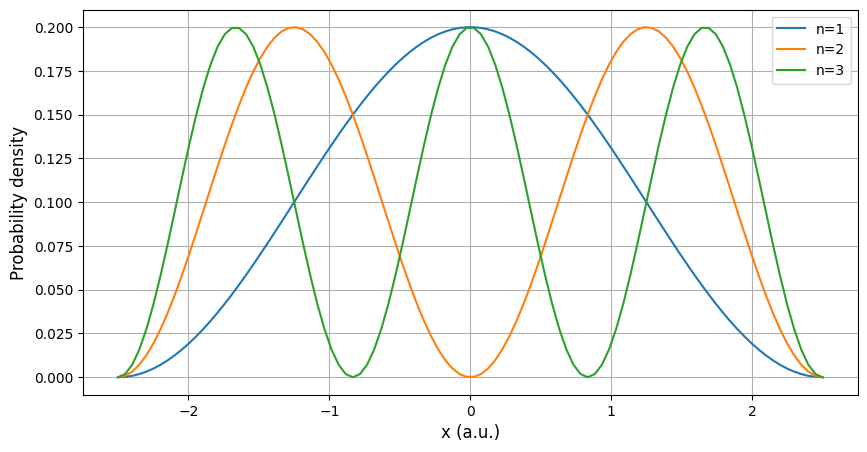

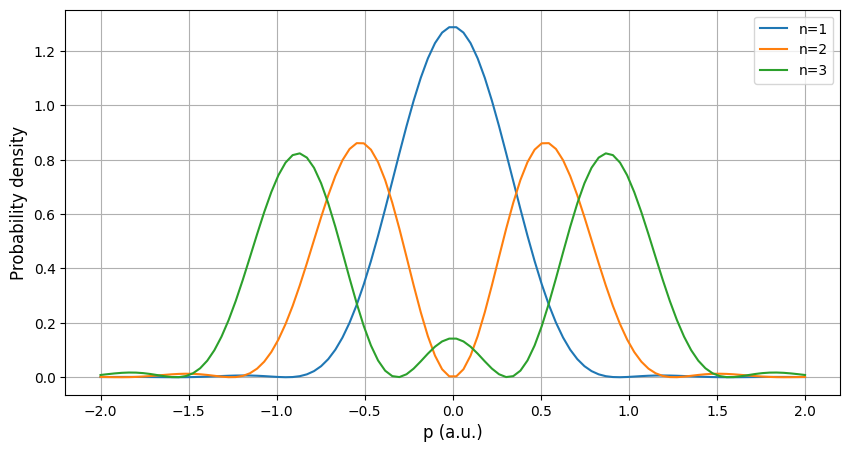

In [10]:
def plot_probability_density_x(L):

    x_values= np.linspace(-L/2, L/2, 100)
    psi_values_ground_state = []
    psi_values_first_excited_state = []
    psi_values_second_excited_state = []

    for x in x_values:
            psi_values_ground_state.append(psi_x_odd(x,1,L)**2)

    for x in x_values:
            psi_values_first_excited_state.append(psi_x_even(x,2,L)**2)

    for x in x_values:
            psi_values_second_excited_state.append(psi_x_odd(x,3,L)**2)

    plt.figure(figsize=(10, 5))
    plt.plot(x_values, psi_values_ground_state, linestyle='-', label='n=1')
    plt.plot(x_values, psi_values_first_excited_state,linestyle='-', label='n=2')
    plt.plot(x_values, psi_values_second_excited_state, linestyle='-', label='n=3')
    plt.xlabel('x (a.u.)', fontsize=12)
    plt.ylabel('Probability density', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_probability_density_p(L):

    p_values= np.linspace(-10/L, 10/L, 100)
    psi_values_ground_state = []
    psi_values_first_excited_state = []
    psi_values_second_excited_state = []

    for x in p_values:
            psi_values_ground_state.append(psi_p_odd(x,1,L)**2)

    for x in p_values:
            psi_values_first_excited_state.append(psi_p_even(x,2,L)**2)

    for x in p_values:
            psi_values_second_excited_state.append(psi_p_odd(x,3,L)**2)

    plt.figure(figsize=(10, 5))
    plt.plot(p_values, psi_values_ground_state, linestyle='-', label='n=1')
    plt.plot(p_values, psi_values_first_excited_state,linestyle='-', label='n=2')
    plt.plot(p_values, psi_values_second_excited_state, linestyle='-', label='n=3')
    plt.xlabel('p (a.u.)', fontsize=12)
    plt.ylabel('Probability density', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()


plot_probability_density_x(5)
plot_probability_density_p(5)

<ipython-input-8-7ed003997c3e>:63: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  result, error = quad(entropy_p, a, b, args=(n,L,), limit=1000)


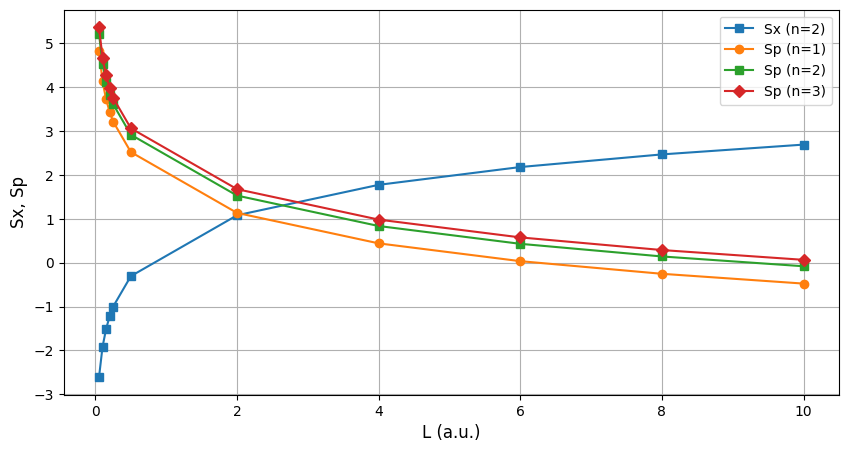

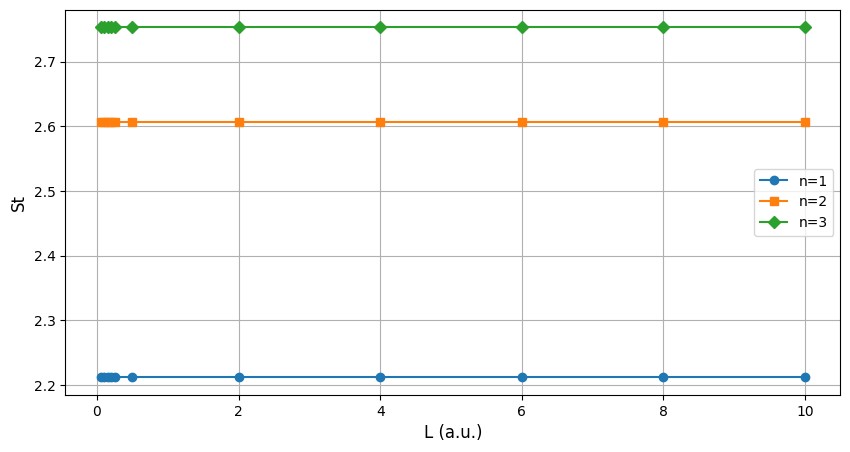

In [11]:
def plot_entropies():

    widths = [0.05,0.1,0.15,0.2,0.25,0.5,2,4,6,8,10]

    entropy_x_values_first_excited_state = [calc_entropy_x(2, L) for L in widths]
    entropy_p_values_ground_state = [calc_entropy_p(1, L) for L in widths]
    entropy_p_values_first_excited_state = [calc_entropy_p(2, L) for L in widths]
    entropy_p_values_second_excited_state = [calc_entropy_p(3, L) for L in widths]


    plt.figure(figsize=(10, 5))
    plt.plot(widths, entropy_x_values_first_excited_state, marker="s", linestyle='-', label='Sx (n=2)')
    plt.plot(widths, entropy_p_values_ground_state, marker="o",linestyle='-', label='Sp (n=1)')
    plt.plot(widths, entropy_p_values_first_excited_state, marker="s", linestyle='-', label='Sp (n=2)')
    plt.plot(widths, entropy_p_values_second_excited_state, marker="D", linestyle='-', label='Sp (n=3)')
    plt.xlabel('L (a.u.)', fontsize=12)
    plt.ylabel('Sx, Sp', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_total_entropy():

    widths = [0.05,0.1,0.15,0.2,0.25,0.5,2,4,6,8,10]

    entropy_t_values_ground_state = [calc_entropy_x(1, L)+calc_entropy_p(1, L) for L in widths]
    entropy_t_values_first_excited_state = [calc_entropy_x(2, L) +calc_entropy_p(2, L) for L in widths]
    entropy_t_values_second_excited_state = [calc_entropy_x(3, L)+calc_entropy_p(3, L) for L in widths]


    plt.figure(figsize=(10, 5))

    plt.plot(widths, entropy_t_values_ground_state, marker="o",linestyle='-', label='n=1')
    plt.plot(widths, entropy_t_values_first_excited_state, marker="s", linestyle='-', label='n=2')
    plt.plot(widths, entropy_t_values_second_excited_state, marker="D", linestyle='-', label='n=3')
    plt.xlabel('L (a.u.)', fontsize=12)
    plt.ylabel('St', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()


plot_entropies()
plot_total_entropy()